# Stellar Evolution 
## Calvin Sykes

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.interpolate

In [2]:
# Matplotlib settings
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2

In [3]:
# Convenience function to return a specific column from the data file
def getcol(data, idx):
    return data[:,idx]

**Plot a line graph of $\log P$ as a function of $\log \rho$. Estimate the gradient of the curve, and from that calculate an approximate polytropic index for the star.**

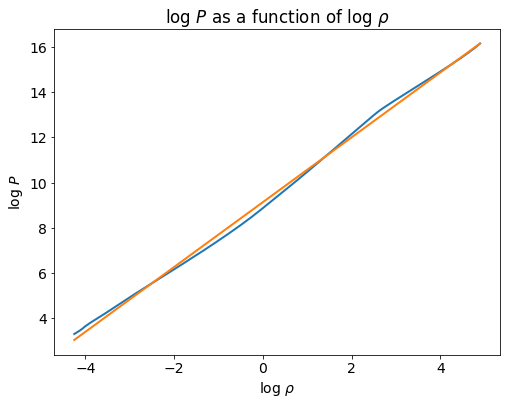

In [4]:
data = np.loadtxt('structure_00000.txt')

# numbers of columns in data file
col_pressure = 3
col_density = 4

log_density = np.log10(getcol(data, col_density))
log_pressure = np.log10(getcol(data, col_pressure))

# use linear fit to get gradient
m, c, _, _, _ = scipy.stats.linregress(log_density, log_pressure)

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$\log\ \rho$')
ax.set_ylabel(r'$\log\ P$')
ax.set_title(r'$\log\ P$ as a function of $\log\ \rho$')
plt.plot(log_density, log_pressure)
plt.plot(log_density, [m * x + c for x in log_density])
plt.show()

The polytropic index $n$ is given by $n=1/(\gamma-1)$, where $P=K\rho^\gamma$.

We have $\log(P)=m\log(\rho)+c$. Hence the gradient $m$ is equal to $\gamma$.

In [5]:
polytropic_index = 1 / (m - 1)
print('Polytropic index is {:.3f}'.format(polytropic_index))

Polytropic index is 2.307


**Make a line plot of the radiative temperature gradient $\nabla_\mathrm{rad}$ and adiabatic temperature gradient $\nabla_\mathrm{ad}$ (where $\nabla = \mathrm{d}\log T/\mathrm{d}\log P$) as a function of $\log T$. Hence identify the size of the outer convection zone expressed as a fraction of the total radius of the star.**

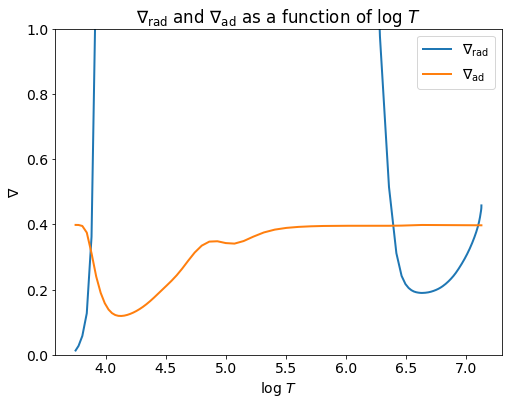

In [6]:
# numbers of columns in data file
col_rad_temp_grad = 15
col_adb_temp_grad = 10
col_temp = 5

rad_temp_grad = getcol(data, col_rad_temp_grad)
adb_temp_grad = getcol(data, col_adb_temp_grad)
log_temp = np.log10(getcol(data, col_temp))

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$\log\ T$')
ax.set_ylabel(r'$\nabla$')
ax.set_ylim(0, 1)
ax.set_title(r'$\nabla_\mathrm{rad}$ and $\nabla_\mathrm{ad}$ as a function of $\log\ T$')
plt.plot(log_temp, rad_temp_grad, label='$\\nabla_\\mathrm{rad}$')
plt.plot(log_temp, adb_temp_grad, label='$\\nabla_\\mathrm{ad}$')
plt.legend()
plt.show()

In [7]:
# we are interested in regions where the radiative gradient exceeds the adiabatic one
# by eye, we also need to exclude the tiny convective region in the core
log_temp_filter = (rad_temp_grad > adb_temp_grad) & (log_temp < 6.5)

convective = log_temp[log_temp_filter]

log_temp_lower = convective[0]
log_temp_upper = convective[-1]

print('The convective region extends between log T values of {:.3g} and {:.3g}'
      .format(log_temp_lower, log_temp_upper))

The convective region extends between log T values of 3.88 and 6.36


To find the corresponding radius coordinates, we plot $\log\ T$ against $r$.

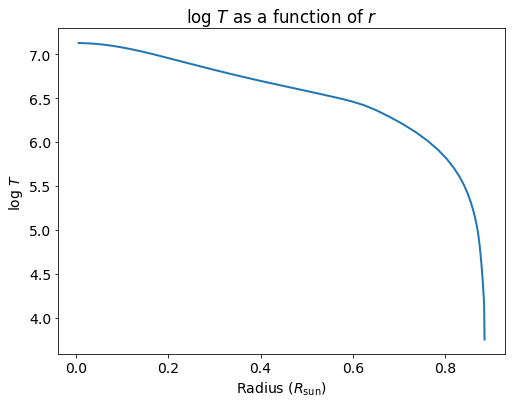

In [8]:
col_radius = 1
radius = getcol(data, col_radius)

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'Radius $(R_\mathrm{sun})$')
ax.set_ylabel(r'$\log\ T$')
ax.set_title(r'$\log\ T$ as a function of $r$')
plt.plot(radius, log_temp)
plt.show()

Linear interpolation of the curve above can be used to find the radial coordinates corresponding to the start and end of the convective region.

In [9]:
r_func_log_temp = scipy.interpolate.interp1d(log_temp, radius)
r_inner = float(r_func_log_temp(log_temp_upper))
r_outer = float(r_func_log_temp(log_temp_lower))

print('Outer convective zone extends between {:.3g} and {:.3g} R_sun'
      .format(r_inner, r_outer))

Outer convective zone extends between 0.652 and 0.886 R_sun


**Estimate the age of the star and the mass of the helium core at the point where the star begins its first ascent of the red giant branch.**

To find this point, need to draw HR diagram.

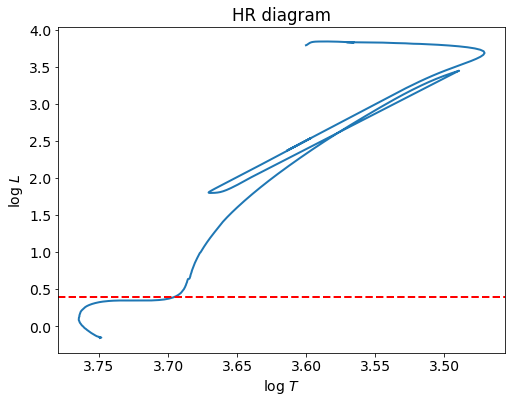

In [10]:
summary = np.loadtxt('summary.txt')

# numbers of columns in data file
col_temperature = 5
col_luminosity = 3

# these quantities are already reported as logs
log_temp = (getcol(summary, col_temperature))
log_luminosity = (getcol(summary, col_luminosity))

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$\log\ T$')
ax.set_ylabel(r'$\log\ L$')
ax.set_title('HR diagram')
ax.invert_xaxis()
plt.plot(log_temp, log_luminosity)
plt.axhline(0.4, color='r', linestyle='--')
plt.show()

From HR diagram above, start of first RGB ascent is at $\log(L/L_\mathrm{sun})\sim 0.4$.

In [11]:
rgb_log_l = 0.4

Plot $\log\ L$ against $\log\ t$ to find corresponding age.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


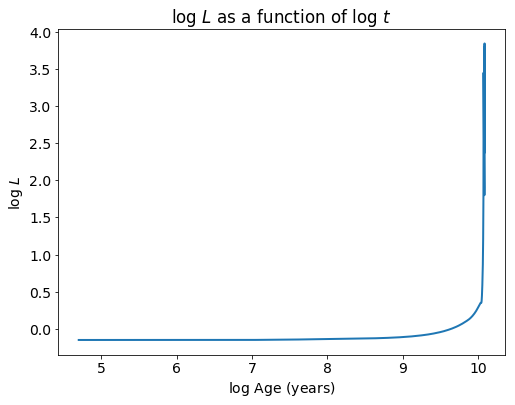

In [12]:
col_age = 1
log_age = np.log10(getcol(summary, col_age))

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$\log\ \mathrm{Age}$ (years)')
ax.set_ylabel(r'$\log\ L$')
ax.set_title(r'$\log\ L$ as a function of $\log\ t$')
plt.plot(log_age, log_luminosity)
plt.show()

In [13]:
log_age_func_log_l = scipy.interpolate.interp1d(log_luminosity, log_age)
rgb_log_age = float(log_age_func_log_l(rgb_log_l))

print('Age at start of RGB ascent is {:.3g} yrs'.format(10**rgb_log_age))

Age at start of RGB ascent is 1.13e+10 yrs


Finally, plot age against helium core mass.

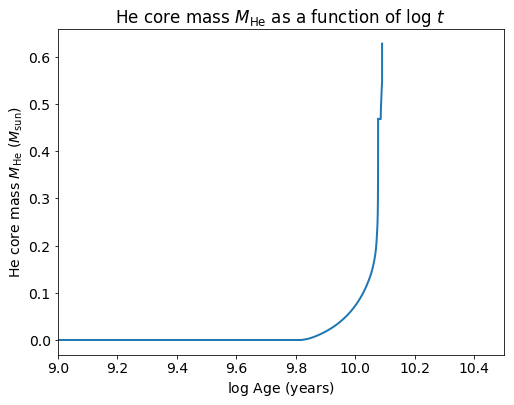

In [14]:
col_he_core_mass = 23
he_core_mass = getcol(summary, col_he_core_mass)

plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$\log\ \mathrm{Age}$ (years)')
ax.set_xlim(9, 10.5)
ax.set_ylabel(r'He core mass $M_\mathrm{He}\ (M_\mathrm{sun})$')
ax.set_title(r'He core mass $M_\mathrm{He}$ as a function of $\log\ t$')
plt.plot(log_age, he_core_mass)
plt.show()

In [15]:
he_core_mass_func_log_age = scipy.interpolate.interp1d(log_age, he_core_mass)
rgb_he_core_mass = float(he_core_mass_func_log_age(rgb_log_age))

print('He core mass at start of RGB ascent is {:.3g} M_sun'.format(rgb_he_core_mass))

He core mass at start of RGB ascent is 0.14 M_sun
